### Desafío - Dimensionalidad y Agrupación (I)

<br>
<br>

Nombre: Juan Oyarce

Profesor: Gabriel Tamayo

Generación: G2

* Para poder realizar esta actividad debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el .zip


### Contexto

Para esta actividad utilizaremos un subconjunto de 25 items de la International Personality Item Pool, aplicados a 2800 individuos. El objetivo de esta información es desarrollar perfiles de personalidad en base a una serie de oraciones asociadas a las características Amabilidad, Escrupolisidad, Extroversión, Neuroticismo, Apertura. Los individuos deben responder qué tan adecuada es la oración respecto a su personalidad en base a 6 categorías:
* 1: No me representa para nada.
* 2: No me representa.
* 3: Algunas cosas no me representan.
* 4: Algunas cosas me representan.
* 5: Me representa.
* 6: Me representa completamente.

Las 25 preguntas son:
* A1 Soy indiferente a los sentimientos de otros.
* A2 Me preocupo del bienestar de otros.
* A3 Sé cómo confortar a otros.
* A4 Me agradan los niños.
* A5 Hago sentir tranquila a la gente.
* C1 Soy exacto en mi trabajo.
* C2 Sigo con mis tareas hasta que todo esté perfecto.
* C3 Hago cosas siguiendo un plan.
* C4 Hago cosas con el mínimo esfuerzo.
* C5 Pierdo mi tiempo.
* E1 No hablo mucho con las personas.
* E2 Me es dificil acercarme a otros.
* E3 Sé cómo cautivar gente.
* E4 Hago amigos de forma fácil.
* E5 Puedo tomar el cargo de las cosas.
* N1 Me enojo con facilidad.
* N2 Me irrito con facilidad.
* N3 Tengo cambios de humor frecuentes.
* N4 Usualmente me siento melancólico.
* N5 Entro en pánico con facilidad.
* O1 Estoy lleno de ideas.
* O2 Evito leer material difícil.
* O3 Tiendo a llevar la conversación a niveles más altos.
* O4 Dedico tiempo a la reflexión de cosas.
* O5 No profundizaré sobre una materia específica.

Se registraron una serie de covariables sobre características demográficas de los encuestados:
* gender Hombre = 1, Mujer =2.
* education 1 = Educación Media Incompleta, 2 = Educación Media Completa, 3 = Educación Universitaria Incompleta, 4 = Educación Universitaria Completa 5 = Estudios de Postgrado.
* age Edad en Años.


Implementaremos un modelo de extracción factorial para identificar los principales perfiles
psicológicos.


### Desafío 1: Lectura de archivos

Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.
Importe la base de datos bfi.csv y asígnela a un objeto df.
Solicite las primeras 5 observaciones con head.

In [1]:
import pandas as pd
pd.options.display.max_columns = None #instrucción para que muestre todas las columnas del dataframe sin abreviarlas
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import factor_analyzer as factor
import missingno as msngo
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix,roc_auc_score
import warnings

warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("bfi.csv")
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [3]:
df.shape 

(2800, 29)

### Desafío 2: Preprocesamiento
* Elimine las columnas redundantes de la base, tal como 'Unnamed: 0' .
* Analice el patrón de datos perdidos con missingno . Comente cuáles son las principales variables con mayores tasas de valores perdidos.
* Genere un nuevo objeto donde almacenará la base sin valores perdidos.

In [4]:
df.columns


Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [5]:
df.drop(df.columns[[0]], axis=1, inplace=True) # eliminar la primera columna

In [6]:
df.isnull().sum()

A1            16
A2            27
A3            26
A4            19
A5            16
C1            21
C2            24
C3            20
C4            26
C5            16
E1            23
E2            16
E3            25
E4             9
E5            21
N1            22
N2            21
N3            11
N4            36
N5            29
O1            22
O2             0
O3            28
O4            14
O5            20
gender         0
education    223
age            0
dtype: int64

<Figure size 288x288 with 0 Axes>

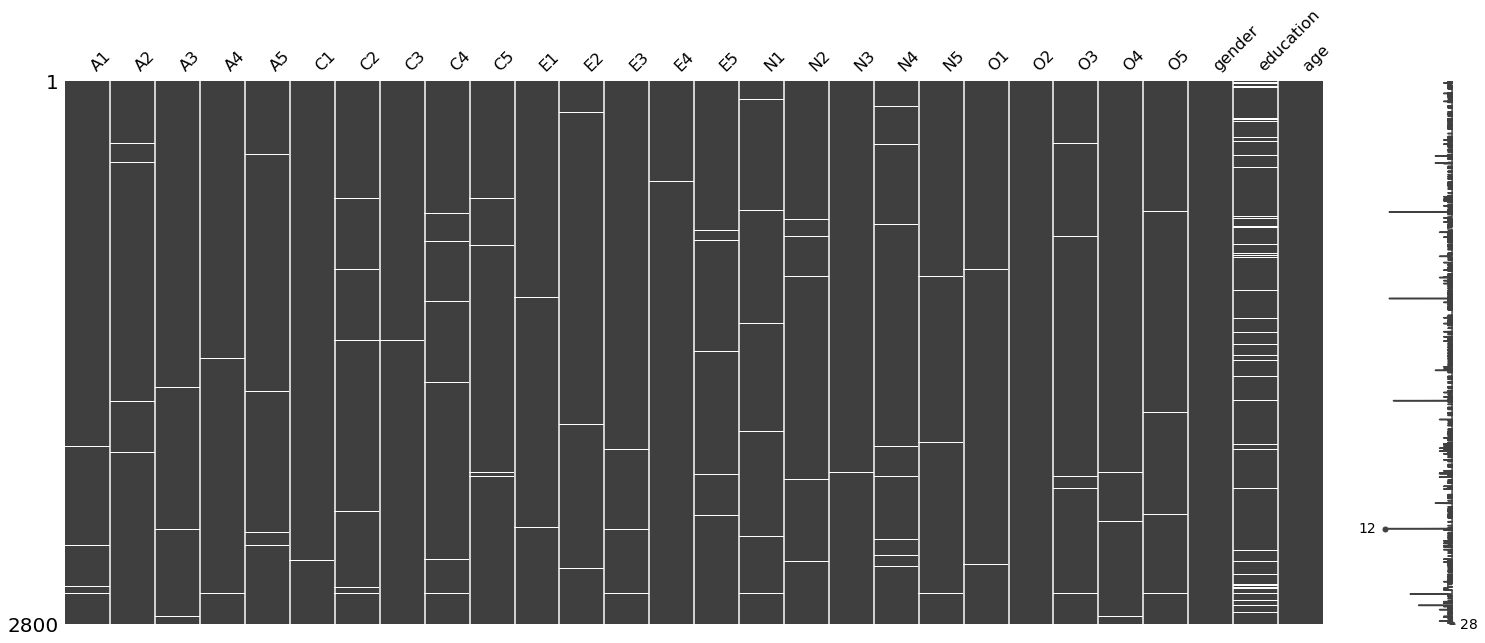

In [7]:
plt.figure(figsize=(4,4))
msngo.matrix(df);


In [8]:
dfm = df.dropna(how="any")


- Las variables que presentan mayor cantidad  de datos perdidos, según el conteo, y según el gráfico de msngo es 'education'  y las respuestas del cuestionario, tienen en general 20 datos perdidos como promedio; las variables de genero y edad no tienen datos perdidos. 

In [9]:
dfm.shape 

(2236, 28)

### Desafío 3: Descripción
* Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.
* Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.
* Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap .
* Comente sobre los principales patrones de correlación entre las preguntas de la batería.

In [10]:
dfm_p=dfm.loc[:,['A1', 'A2', 'A3','A4','A5','C1','C2','C3','C4','C5','E1','E2','E3','E4','E5','N1','N2','N3','N4','N5','O1', 'O2', 'O3', 'O4',
       'O5']]

In [11]:
dfm_p.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

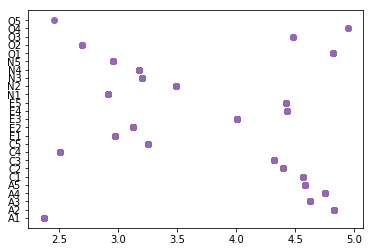

In [12]:
variable, mean = [], []
for colname, serie in dfm_p.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    tmp_df = pd.DataFrame({
        'var': variable,
        'mean': mean
    }).sort_values(by=['mean'])
    plt.plot(tmp_df['mean'], tmp_df['var'], 'o')



- Se puede apreciar en la figura, que los set de preguntas correspondientes al item de amabilidad, apertura y escrupolisidad, tienen los mayores valores de puntuación, en general, extroversión tiene valores medianos y neuroticismo tiene valores bajos.

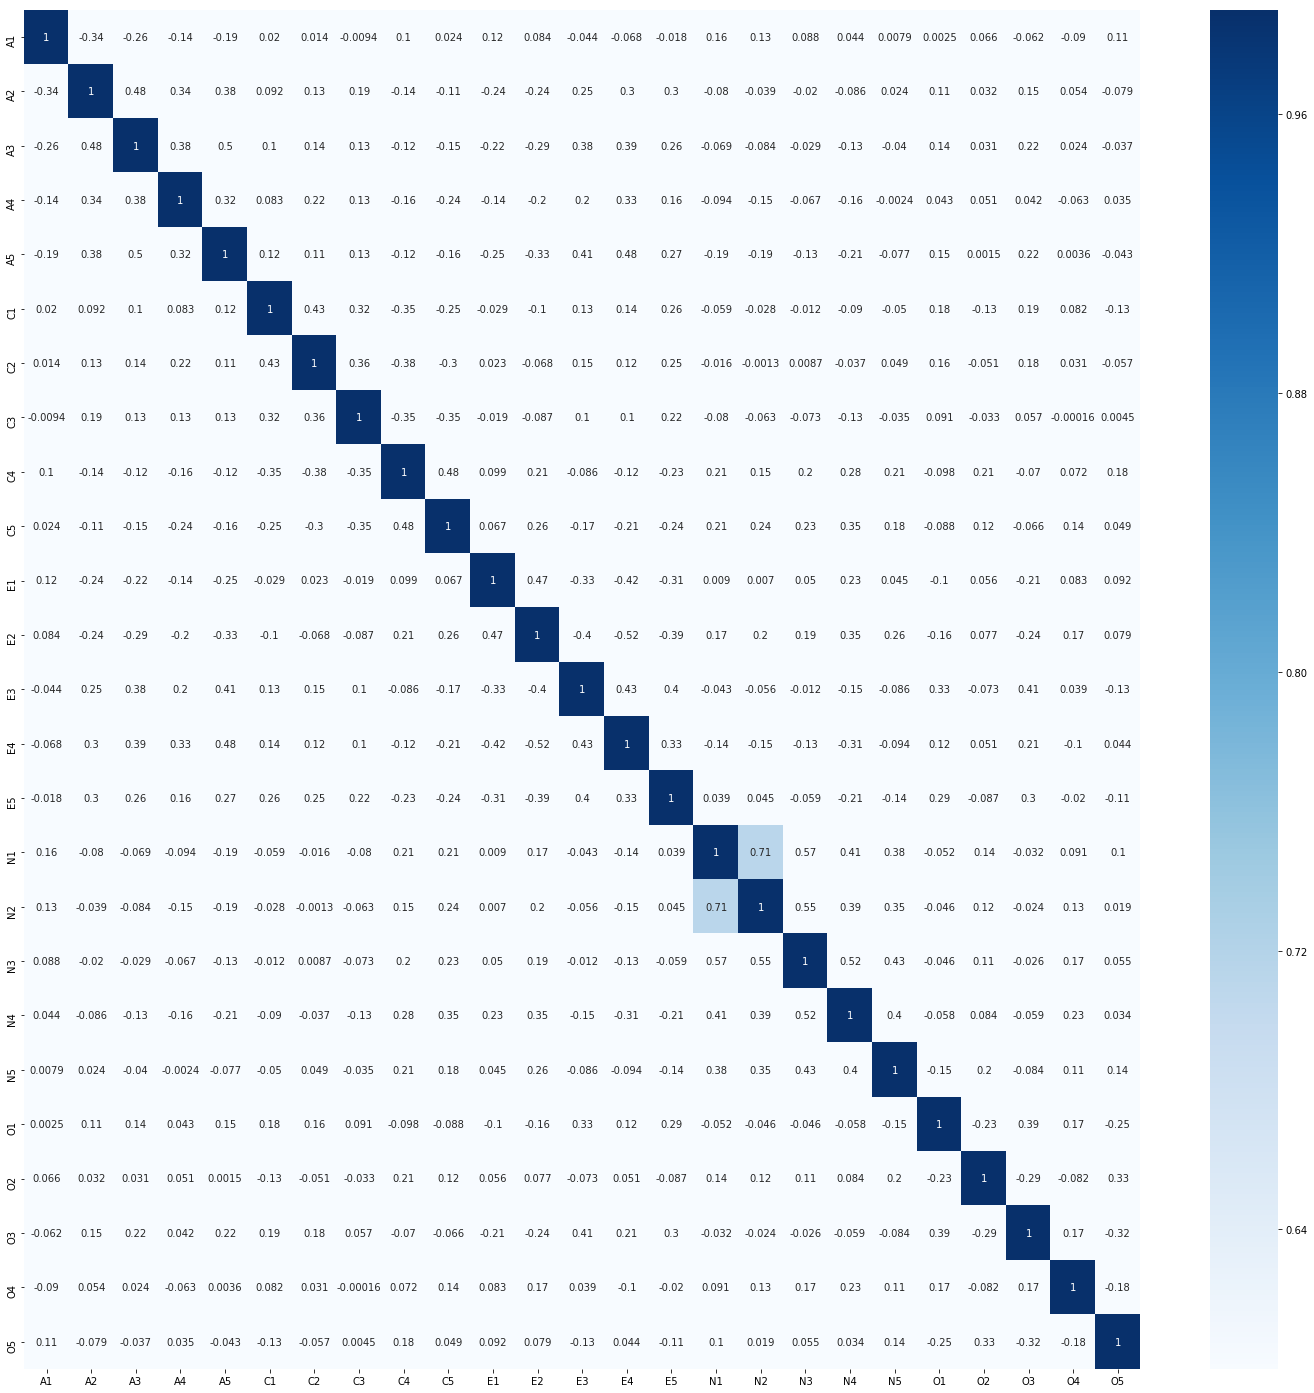

In [13]:
dfm_p.corr()
plt.figure(figsize=(25,25)) 
sns.heatmap(dfm_p.corr(), cmap='Blues',vmin=0.6, vmax=0.99, annot=True)

In [15]:
dfmc= dfm_p.corr()
dfmc[dfmc>=abs(0.5)]  #Filtramos pora las columnnas significativas con correlaciones superiores a 0.5 

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
A1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,NaN,NaN,1.000000,NaN,0.502886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,0.502886,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C1,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#Función para obtener correlaciones pareadas como un diccionario
def get_corrs(df):
    """
    Definición: Función que retorna un diccionario con la matriz de correlaciones pareadesa
    Input: Dataframe que se correlacionará
    Outpout: Diccionario con la clave correspondiente a las columnas confrontadas, valor de la correlación de Pearson
    """
    col_correlations = df.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

my_corrs = get_corrs(dfm_p)
my_corrs 

{('A1', 'A1'): 0.0,
 ('A1', 'A2'): 0.0,
 ('A1', 'A3'): 0.0,
 ('A1', 'A4'): 0.0,
 ('A1', 'A5'): 0.0,
 ('A1', 'C1'): 0.0,
 ('A1', 'C2'): 0.0,
 ('A1', 'C3'): 0.0,
 ('A1', 'C4'): 0.0,
 ('A1', 'C5'): 0.0,
 ('A1', 'E1'): 0.0,
 ('A1', 'E2'): 0.0,
 ('A1', 'E3'): 0.0,
 ('A1', 'E4'): 0.0,
 ('A1', 'E5'): 0.0,
 ('A1', 'N1'): 0.0,
 ('A1', 'N2'): 0.0,
 ('A1', 'N3'): 0.0,
 ('A1', 'N4'): 0.0,
 ('A1', 'N5'): 0.0,
 ('A1', 'O1'): 0.0,
 ('A1', 'O2'): 0.0,
 ('A1', 'O3'): 0.0,
 ('A1', 'O4'): 0.0,
 ('A1', 'O5'): 0.0,
 ('A2', 'A1'): -0.34019653769951735,
 ('A2', 'A2'): 0.0,
 ('A2', 'A3'): 0.0,
 ('A2', 'A4'): 0.0,
 ('A2', 'A5'): 0.0,
 ('A2', 'C1'): 0.0,
 ('A2', 'C2'): 0.0,
 ('A2', 'C3'): 0.0,
 ('A2', 'C4'): 0.0,
 ('A2', 'C5'): 0.0,
 ('A2', 'E1'): 0.0,
 ('A2', 'E2'): 0.0,
 ('A2', 'E3'): 0.0,
 ('A2', 'E4'): 0.0,
 ('A2', 'E5'): 0.0,
 ('A2', 'N1'): 0.0,
 ('A2', 'N2'): 0.0,
 ('A2', 'N3'): 0.0,
 ('A2', 'N4'): 0.0,
 ('A2', 'N5'): 0.0,
 ('A2', 'O1'): 0.0,
 ('A2', 'O2'): 0.0,
 ('A2', 'O3'): 0.0,
 ('A2', 'O4'): 0.0,
 ('

- Podemos apreciar que las correlaciones significativas (iguales o superiores a 0.5) solo se dan para algunas preguntas de los items de amabilidad y neuroticismo, que indican que hay colinealidad entre dichas preguntas, por lo demás no hay correlaciones significativas entre el set de preguntas completo. 

### Desafío 4: Extracción de factores
* Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-MeyerOlkin. Comente los resultados.
* Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.
* Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.
* Refactorice el objeto con FactorAnalyzer() con rotacion (rotacion = 'promax') y la cantidad de dimensiones válidas que informó el scree plot.
* Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.

In [37]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value= calculate_bartlett_sphericity(dfm_p)
chi_square_value, p_value

(16509.6735504972, 0.0)

- El test de esfericidad de Bartlett nos indica que la matriz de correlaciones no es una matriz de identidad, por lo tanto las correlaciones son significativas entre las variables, el valor alto y el p valor aproximado de 0, nos permiten rechazar la hipotesis nula, de que efectivamente es una matriz de identidad. 


In [38]:
from factor_analyzer.factor_analyzer import calculate_kmo
calculate_kmo(dfm_p)

(array([0.73783211, 0.83426339, 0.87158082, 0.87042369, 0.90061871,
        0.83810325, 0.78841959, 0.84946345, 0.82364592, 0.86188771,
        0.84151427, 0.88389524, 0.89307072, 0.87818653, 0.89404239,
        0.7781268 , 0.77845262, 0.86005895, 0.88625489, 0.86049617,
        0.85501182, 0.78381059, 0.83374388, 0.78111794, 0.75804877]),
 0.8468295031833752)

- El valor de KMO compara la magnitud de los coeficientes de correlación observados con la magnitud de los coeficientes de correlación parcial, el valor es  aproximado de 0.85 , si es superior a 0.7, nos indica que las correlaciones son significativas y el análisis factorial es adecuado.

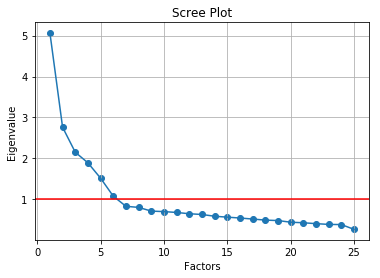

In [39]:
fa=factor.FactorAnalyzer(n_factors=10, rotation=None)
fa.fit(dfm_p)
# Check Eigenvalues - Reportan que tanta varianza se puede atribuir un factor específico
ev, v = fa.get_eigenvalues()
# La cantidad de factores a generar será igual a los factores con un ev mayor a 1.
plt.scatter(range(1,dfm_p.shape[1]+1),ev)
plt.plot(range(1,dfm_p.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1, color="r")
plt.grid()
plt.show()


- La interpretación de los Eigenvalues, nos señala en que momento el número de factores extraídos se estabiliza, cuando el valor es más próximo a 0, para éste caso se acepta un punto de corte de 1, y se observa que entre 5 y 6 factores explican gran parte de la variabilidad 

In [40]:
# se genera un nuevo objeto con la cantidad de factores sobre  ev>1
fa = factor.FactorAnalyzer(n_factors = 6, rotation = 'promax')
factor1_values = fa.fit_transform(dfm_p)
# Obtengo los pesos 'loadings' en formato df
loadings = pd.DataFrame(fa.loadings_, index = dfm_p.columns, columns=["Factor1", "Factor2","Factor3","Factor4","Factor5","Factor6"])


In [41]:
loadings[loadings>.5]             # filtro por aquellos factores que sean superiores a 0.5 (correlación significativa)

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,NaN,NaN,NaN,NaN,NaN,NaN
A2,NaN,NaN,NaN,NaN,0.639541,NaN
A3,NaN,NaN,NaN,NaN,NaN,NaN
A4,NaN,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,NaN,NaN,NaN,NaN
C1,NaN,NaN,0.588791,NaN,NaN,NaN
C2,NaN,NaN,0.737840,NaN,NaN,NaN
C3,NaN,NaN,0.608281,NaN,NaN,NaN
C4,NaN,NaN,NaN,NaN,NaN,NaN
C5,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# se genera un nuevo objeto con la cantidad de factores sobre  ev>1
fa = factor.FactorAnalyzer(n_factors = 5, rotation = 'promax')
factor1_values = fa.fit_transform(dfm_p)
# Obtengo los pesos 'loadings' en formato df
loadings = pd.DataFrame(fa.loadings_, index = dfm_p.columns, columns=["Factor1", "Factor2","Factor3","Factor4","Factor5"])

In [43]:
loadings[loadings>.5] 

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,NaN,NaN,NaN,NaN,NaN
A2,NaN,NaN,NaN,0.587349,NaN
A3,NaN,NaN,NaN,0.603462,NaN
A4,NaN,NaN,NaN,NaN,NaN
A5,NaN,NaN,NaN,NaN,NaN
C1,NaN,NaN,0.564973,NaN,NaN
C2,NaN,NaN,0.690145,NaN,NaN
C3,NaN,NaN,0.598839,NaN,NaN
C4,NaN,NaN,NaN,NaN,NaN
C5,NaN,NaN,NaN,NaN,NaN


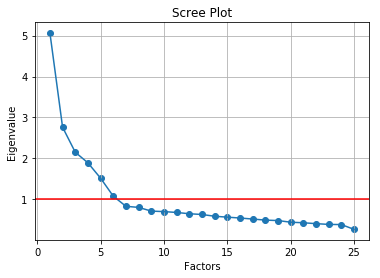

In [44]:
plt.scatter(range(1,dfm_p.shape[1]+1),ev)
plt.plot(range(1,dfm_p.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1, color="r")
plt.grid()
plt.show()


In [45]:
# renombramos los factores de acuertdos las características principales de la encuesta
loadings.rename(columns={'Factor1': 'Neuroticismo', 'Factor2': 'Extroversión', 'Factor3': 'Escrupolisidad', 'Factor4': 'Amabilidad', 'Factor5': 'Apertura'}, inplace=True)

loadings

,Neuroticismo,Extroversión,Escrupolisidad,Amabilidad,Apertura
A1,0.149412,0.116593,0.068191,-0.451705,-0.075617
A2,0.049023,0.130895,0.072670,0.587349,-0.011234
A3,0.036805,0.243638,0.021319,0.603462,-0.014470
A4,-0.026504,0.112788,0.186193,0.408451,-0.185005
A5,-0.085975,0.323873,-0.024192,0.484016,0.004120
C1,0.078560,-0.038014,0.564973,-0.025636,0.161000
C2,0.155952,-0.107284,0.690145,0.058758,0.044214
C3,0.025665,-0.088519,0.598839,0.065734,-0.056700
C4,0.175909,0.062198,-0.644196,0.032090,-0.054569
C5,0.202749,-0.069523,-0.557100,0.031139,0.086478


- En  base a los valores obtenidos, tenemos que es posible agrupar las preguntas en 5 factores asociados a los valores puntuados, la nomenclatura sigue los nombres sugeridos: Neuroticismo, Extroversión, Escrupolisidad, Amabilidad y Apertura, de acuerdo con los items de preguntas.

In [46]:
factor_var = fa.get_factor_variance ()
factor_var_array= np.array(factor_var).reshape(3,5)  # convertimos el arreglo o matriz, a un arreglo de np
factor_var_array        
dffv=pd.DataFrame(data=factor_var_array ) 
dffv.rename(columns={0: 'Factor 1_Neuroticismo', 1: 'Factor 2_Extroversión', 2: 'Factor 3_Escrupolisidad', 3: 'Factor 4_Amabilidad', 4: 'Factor 5_Apertura'}, inplace=True)
dffv.rename(index={0: 'SS Loadings',1: 'Proportion Var',2: 'Cumulative Var'})


,Factor 1_Neuroticismo,Factor 2_Extroversión,Factor 3_Escrupolisidad,Factor 4_Amabilidad,Factor 5_Apertura
SS Loadings,2.712895,2.519441,2.029886,1.578099,1.481834
Proportion Var,0.108516,0.100778,0.081195,0.063124,0.059273
Cumulative Var,0.108516,0.209293,0.290489,0.353613,0.412886


- La tabla muestra la varianza explicada por cada factor y el porcentaje de varianza acumulada, podemos observar que con 5 factores se logra explicar el 41 % de la varianza, siendo los factores 

### Desafío 5: Modelación de factores
* Extraiga los puntajes del modelo factorial a su base de datos.
*  Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:


$${y}={{\beta }_{0} + {\beta }_{1} \cdot {gender} + {\beta }_{2} \cdot {education} + {\beta }_{3} \cdot {age} +{\epsilon}_{i}}$$


<br>
Tips: Utilice statsmodels para la generación del modelo y comente que tan significativos son los regresores, estos  afectan positiva o negativamente el factor estimado?.


In [47]:
# extraemos los puntajes del modelo factorial y los agregamos al dataset principal modificado

col_names=['Neuroticismo','Extroversión','Escrupolisidad','Amabilidad', 'Apertura']

for col in col_names:
    dfm[col] = None
    
dfm.loc[:,col_names]=fa.transform(dfm.loc[:,'A1':'O5'])

In [48]:
dfm.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age,Neuroticismo,Extroversión,Escrupolisidad,Amabilidad,Apertura
5,6.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,1.0,3.0,2.0,1.0,6.0,5.0,6.0,3.0,5.0,2.0,2.0,3.0,4.0,3,5.0,6.0,1.0,2,3.0,21,1.243956,0.026466,1.425221,0.400030,0.150861
7,4.0,3.0,1.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,6.0,4.0,2.0,1.0,6.0,3.0,2.0,6.0,4.0,3.0,2,4.0,5.0,3.0,1,2.0,19,-1.826086,0.578565,-1.283536,-0.574579,-2.161121
10,4.0,4.0,5.0,6.0,5.0,4.0,3.0,5.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,3.0,3.0,4.0,2.0,3.0,5.0,3,5.0,6.0,3.0,1,1.0,21,0.199434,-0.166427,-0.180815,-0.348037,-0.103906
14,4.0,5.0,2.0,2.0,1.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,3.0,6.0,5.0,2.0,4.0,2.0,2.0,3.0,5.0,2,5.0,5.0,5.0,1,1.0,17,-0.093299,-0.493933,0.545031,-0.285600,-1.640684
22,1.0,5.0,6.0,5.0,6.0,4.0,3.0,2.0,4.0,5.0,2.0,1.0,2.0,5.0,2.0,2.0,2.0,2.0,2.0,2.0,6.0,1,5.0,5.0,2.0,1,5.0,68,0.190820,-0.869514,-1.337956,0.304959,0.637378


In [49]:
# definición de regresores
variables= ('gender','education','age') #lista con todas las variables
var=' + '.join(variables)

In [50]:
# MRLM factor Neuroticismo
modelo_general = smf.ols('Neuroticismo ~ '+ var, dfm).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Neuroticismo   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     12.56
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           3.82e-08
Time:                        01:09:38   Log-Likelihood:                -2949.3
No. Observations:                2236   AIC:                             5907.
Df Residuals:                    2232   BIC:                             5929.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4739      0.097     -4.889      0.000      -0.664      -0.284
gender         0.2143      0.041      5.249      0.000       0.134       0.294
education     -0.0141      0.018     -0.791      0.429      -0.049       0.021
age            0.0054      0.002      2.933      0.003       0.002       0.009
==============================================================================
Omnibus:                       71.296   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.886
Skew:                          -0.446   Prob(JB):                     2.02e-17
Kurtosis:                       2.829   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos apreciar que el R ajustado es bajisimo, por lo que el modelo no es significativo, es decir los regresores no explican la varianza del neuroticismo, sin embargo entre los coeficientes el genero es el que más aporta y es estadísticamente significativo, la edad también es estadísticamente significativo pero no aporta mucho, la educación no es estadísticamente significativo.

In [51]:
# MRLM factor Extroversión

modelo_general = smf.ols('Extroversión ~ '+ var, dfm).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Extroversión   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     15.38
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           6.63e-10
Time:                        01:09:41   Log-Likelihood:                -2980.5
No. Observations:                2236   AIC:                             5969.
Df Residuals:                    2232   BIC:                             5992.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0124      0.098     -0.127      0.899      -0.205       0.180
gender         0.1843      0.041      4.452      0.000       0.103       0.265
education     -0.0036      0.018     -0.199      0.842      -0.039       0.032
age           -0.0096      0.002     -5.111      0.000      -0.013      -0.006
==============================================================================
Omnibus:                       71.154   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.985
Skew:                           0.273   Prob(JB):                     5.15e-12
Kurtosis:                       2.491   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos apreciar que el R ajustado es bajisimo, por lo que el modelo no es significativo, es decir los regresores no explican la varianza de la extroversión, sin embargo entre los coeficientes el genero es el que más aporta y es estadísticamente significativo, la edad también es estadísticamente significativo pero no aporta demasiado, la educación no es estadísticamente significativo.

In [52]:
# MRLM factor Escrupolisidad

modelo_general = smf.ols('Escrupolisidad ~ '+ var, dfm).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Escrupolisidad   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     13.79
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           6.50e-09
Time:                        01:09:45   Log-Likelihood:                -2878.8
No. Observations:                2236   AIC:                             5766.
Df Residuals:                    2232   BIC:                             5788.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5218      0.094     -5.556      0.000      -0.706      -0.338
gender         0.1665      0.040      4.210      0.000       0.089       0.244
education      0.0016      0.017      0.091      0.927      -0.032       0.035
age            0.0081      0.002      4.491      0.000       0.005       0.012
==============================================================================
Omnibus:                       69.003   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               74.982
Skew:                          -0.447   Prob(JB):                     5.22e-17
Kurtosis:                       2.920   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos apreciar que el R ajustado es bajisimo, por lo que el modelo no es significativo, es decir los regresores no explican la varianza de la escrupolisidad, sin embargo entre los coeficientes el genero es el que más aporta y es estadísticamente significativo, la edad también es estadísticamente significativa pero no aporta mucho, la educación no es estadísticamente significativa.

In [53]:
# MRLM factor Amabilidad

modelo_general = smf.ols('Amabilidad ~ '+ var, dfm).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Amabilidad   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     21.19
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           1.56e-13
Time:                        01:09:48   Log-Likelihood:                -2742.9
No. Observations:                2236   AIC:                             5494.
Df Residuals:                    2232   BIC:                             5517.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0827      0.088     -0.935      0.350      -0.256       0.091
gender        -0.1788      0.037     -4.803      0.000      -0.252      -0.106
education      0.0886      0.016      5.460      0.000       0.057       0.120
age            0.0033      0.002      1.975      0.048    2.44e-05       0.007
==============================================================================
Omnibus:                       34.399   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.902
Skew:                          -0.276   Prob(JB):                     4.35e-08
Kurtosis:                       2.756   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos apreciar que el R ajustado es bajisimo, por lo que el modelo no es significativo, es decir los regresores no explican la varianza de la amabilidad, sin embargo entre los coeficientes el genero es el que más aporta y de manera negativa, es decir los hombres tienden a puntuar menos en amabilidad que las mujeres, y es estadísticamente significativo, la edad también es estadísticamente significativo pero no aporta mucho, la educación también es estadísticamente significativo, pero aporta muy poco.

In [54]:
# MRLM factor Apertura

modelo_general = smf.ols('Apertura ~ '+ var, dfm).fit()
modelo_general.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Apertura   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     42.04
Date:                Thu, 25 Jul 2019   Prob (F-statistic):           2.02e-26
Time:                        01:09:50   Log-Likelihood:                -2776.6
No. Observations:                2236   AIC:                             5561.
Df Residuals:                    2232   BIC:                             5584.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8729      0.090     -9.729      0.000      -1.049      -0.697
gender         0.3896      0.038     10.311      0.000       0.316       0.464
education      0.0123      0.016      0.745      0.456      -0.020       0.045
age            0.0062      0.002      3.599      0.000       0.003       0.010
==============================================================================
Omnibus:                      166.415   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.800
Skew:                          -0.693   Prob(JB):                     2.05e-45
Kurtosis:                       3.539   Cond. No.                         167.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Podemos apreciar que el R ajustado es bajisimo, por lo que el modelo no es significativo, es decir los regresores no explican la varianza de la Apertura, sin embargo entre los coeficientes el genero es el que más aporta y es estadísticamente significativo, la edad también es estadísticamente significativo pero no aporta demasiado, la educación no es estadísticamente significativa.